In [1]:

from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool1D, Flatten, Dense, Dropout, Activation, BatchNormalization, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('df_modelos.csv').drop(columns = 'match_id')
#df = df.sample(frac = 0.5)

In [37]:
dummies = input('¿Desea eliminar las variables Dummies? (Si/No)')
try:
    if dummies.lower() == 'si':
        columnas = df.columns[:-1]
        col_filter = []
        for col in columnas:
            if len(df[col].value_counts().index) > 2:
                col_filter.append(col)
        col_filter.append('radiant_win')
        df = df[col_filter]
    else:
        continue
except Exception as e:
    print(e)
    continue

In [3]:
df.head(3)

,hero_Abaddon_dire,hero_Abaddon_radiant,hero_Alchemist_dire,hero_Alchemist_radiant,hero_Ancient Apparition_dire,hero_Ancient Apparition_radiant,hero_Anti-Mage_dire,hero_Anti-Mage_radiant,hero_Axe_dire,hero_Axe_radiant,...,220_dire,226_dire,229_dire,231_dire,235_dire,242_dire,247_dire,249_dire,254_dire,radiant_win
0,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [4]:
df['radiant_win'] = df['radiant_win'].astype(int)
df.shape

(49558, 540)

In [5]:
X = df.drop(columns = 'radiant_win')
y = df['radiant_win']


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

y_train = y_train.to_numpy()
y_test  = y_test.to_numpy()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [6]:
epochs = 30 # Cantidad de iteraciones (La red va ajustando los pesos en cada iteracion y aprendiendo de los errores)

ear = keras.callbacks.EarlyStopping(monitor = 'accuracy', 
                                    patience = 4) # Esta metrica es importante ya que corta el entrenamiento al no ver mejoras en 4 iteraciones maximo

model = Sequential()

'''
Hyperparametros:
- Funcion de activacion relu: Es una de las muchas funciones de activacion. 
- BatchNormalization: Dentro de las capas ocultas se pueden hacer normalizaciones en cada una de ellas a lo largo del entrenamiento. 
    Los pesos estan variando constantemente en el transcurso de las epocas a lo largo de la Red Neuronal, 
    estos valores se pueden estandarizar dentro de las mismas capas ocultas. 
    Este proceso se llama Batch Normalization.
- Dropout y Pooling: DropOut y Pooling son hyperparametros que se pueden adicionar al modelo para reducir overfitting.
    DropOput consiste en desactivar neuronas en cada capa, es decir, 
    un dropoup del 50 % desactivara la mitad de las neuronas de una de las capas, 
    este proceso ayuda a recudir el sobreajuste.
'''

# Primer capa oculta (Inputs)
model.add(Conv1D(32, 2, activation = 'relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

# Segunda capa oculta
model.add(Conv1D(32, 2, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.4))

# Tercer capa oculta
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

# Activacion Sigmoide
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(lr = 0.0001),metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test), verbose = 1, callbacks = [ear])

Epoch 1/30
1239/1239 [==============================] - 39s 30ms/step - loss: 0.7312 - accuracy: 0.5847 - val_loss: 0.6358 - val_accuracy: 0.6585
Epoch 2/30
1239/1239 [==============================] - 37s 30ms/step - loss: 0.6367 - accuracy: 0.6412 - val_loss: 0.6054 - val_accuracy: 0.6754
Epoch 3/30
1239/1239 [==============================] - 37s 30ms/step - loss: 0.6142 - accuracy: 0.6616 - val_loss: 0.5879 - val_accuracy: 0.6846
Epoch 4/30
1239/1239 [==============================] - 36s 29ms/step - loss: 0.6020 - accuracy: 0.6752 - val_loss: 0.5807 - val_accuracy: 0.6915
Epoch 5/30
1239/1239 [==============================] - 37s 30ms/step - loss: 0.5947 - accuracy: 0.6844 - val_loss: 0.5760 - val_accuracy: 0.6955
Epoch 6/30
1239/1239 [==============================] - 38s 31ms/step - loss: 0.5905 - accuracy: 0.6885 - val_loss: 0.5705 - val_accuracy: 0.7001
Epoch 7/30
1239/1239 [==============================] - 37s 30ms/step - loss: 0.5829 - accuracy: 0.6913 - val_loss: 0.5680 -

In [8]:
metricas = model.evaluate(X_test, y_test)

print('Loss:     ',metricas[0])
print('Accuracy: ', metricas[1])

310/310 [==============================] - 2s 6ms/step - loss: 0.5563 - accuracy: 0.7134
Loss:      0.5563231110572815
Accuracy:  0.7133777141571045


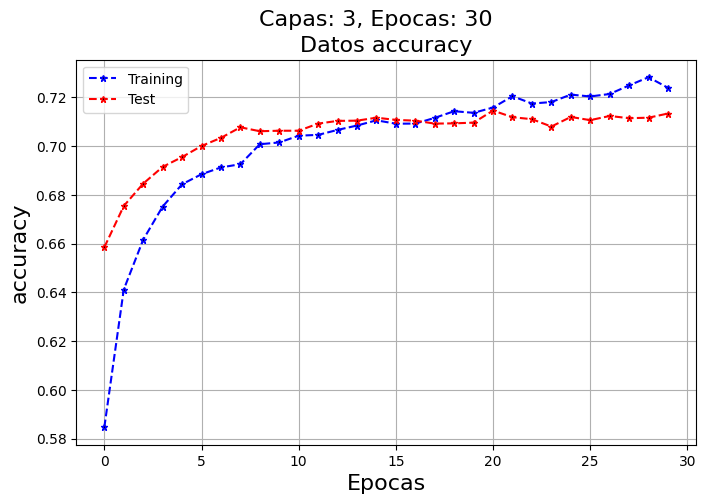

In [10]:
def _get_plots(metricas_train, metricas_test, hyper_p, y_label = 'Metrics'):
    capas = hyper_p['capas']
    epocas = hyper_p['epocas']
    plt.figure(figsize = (8,5))
    plt.plot(
            metricas_train,
            color = 'blue', 
            linestyle = 'dashed', 
            marker = '*', 
            markerfacecolor = 'black', 
            markersize = 5,
            label = 'Training')
    plt.plot(
            metricas_test,
            color = 'red', 
            linestyle = 'dashed', 
            marker = '*', 
            markerfacecolor = 'black', 
            markersize = 5,
            label = 'Test')
    plt.title(f'Datos {y_label}', fontsize=16)
    plt.suptitle(f'Capas: {capas}, Epocas: {epocas}', fontsize=16)
    plt.xlabel('Epocas', fontsize=16); plt.ylabel(y_label, fontsize=16)
    leg = plt.legend(loc='upper left')
    return plt.grid(); plt.show()

_get_plots(history.history['accuracy'],
           history.history['val_accuracy'],
           hyper_p = { 'capas'  : 3, 'epocas' : 30},
           y_label = 'accuracy')

#_get_plots(history.history['loss'],
#           history.history['val_loss'],
#           hyper_p = {'capas'  : 3, 'epocas' : 20},
#           y_label = 'loss')